In [1]:
import TMQGP as tm
import QuarkTM
import tqdm
from numpy import *

import h5py

import matplotlib
matplotlib.style.use('publication23')

In [2]:
erange = linspace(-5, 5, 201)
qrange = linspace(0, 5, 51)

In [3]:
df = h5py.File('/home/const/Numerics/TMQGP/ipy/TMQGP/test/FitChi2/4ch_HI/0.00/data_single_170.hdf5')

Gtab = array(df['Q']['G'])
Stab = array(df['Q']['S'])

mQ = df.attrs['mQ']

In [4]:
T = 0.2

In [71]:
pt1 = QuarkTM.Particle(mQ, qrange, erange, Gtab=Gtab, S=Stab)

In [6]:
ch_conv = QuarkTM.Channel(pt1, pt1, T, ImMode=0, expand=0)
ch_int = QuarkTM.Channel(pt1, pt1, T, ImMode=1, expand=0)

In [18]:
Stab_lim = []
eps_lim = 5e-3

for s in Stab.transpose():
    if max(abs(imag(s))) < eps_lim:
        s_new = real(s) + 1j*imag(s) / max(abs(imag(s))) * eps_lim
    else:
        s_new = s
    Stab_lim += [s_new]

Stab_lim = array(Stab_lim).transpose()

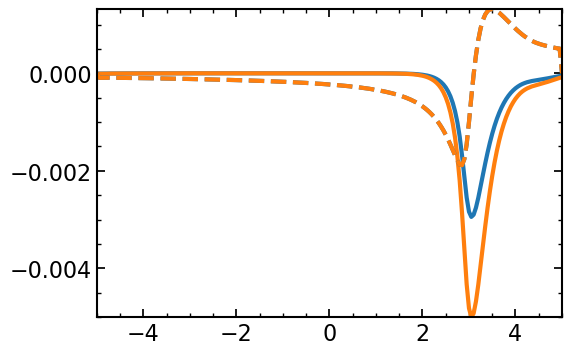

In [19]:
l0, = plt.plot(erange, imag(Stab[:, 30]))
l1, = plt.plot(erange, imag(Stab_lim[:, 30]))

plt.plot(erange, real(Stab[:, 30]), ls='--', c=l0.get_c())
plt.plot(erange, real(Stab_lim[:, 30]), ls='--', c=l1.get_c())

In [20]:
iG = tm.GFInterpolator(qrange, erange, ascontiguousarray(real(Stab_lim)), ascontiguousarray(imag(Stab_lim)), 
                      qrange, pt1.peaks, pt1.widths, "imag", mQ)

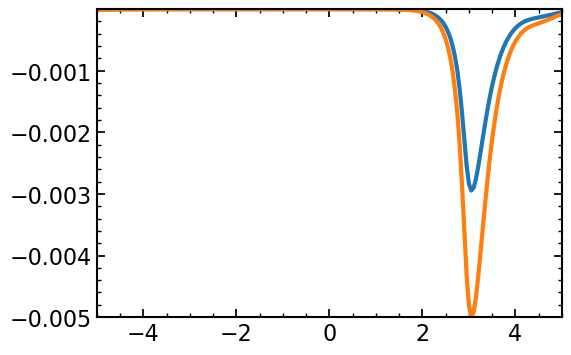

In [21]:
plt.plot(erange, imag(Stab[:, 30]))
plt.plot(erange, imag(Stab_lim[:, 30]))

[]

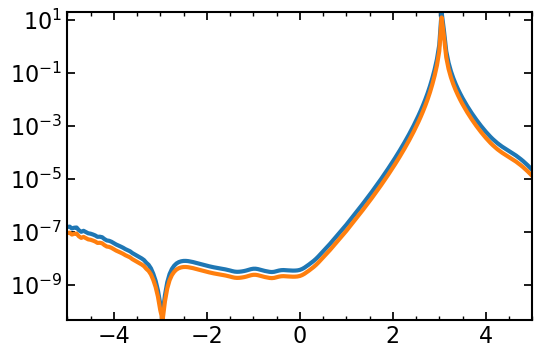

In [22]:
plt.plot(erange, [-iG(3, e) for e in erange])
plt.plot(erange, -imag(pt1.Gtab[:, 30]))
plt.semilogy()

## Try to calculate G2 with a limited width propagator

In [23]:
qrange2 = linspace(0, 10, 101)

In [24]:
e = 1.5

In [25]:
import tqdm

In [26]:
ReG2 = array([tm.ReG2_pole(e, q, T, pt1.R, pt1.R) for q in tqdm.tqdm(qrange2)])

100%|█████████████████████████████████████████████████████████████████████████████| 101/101 [00:01<00:00, 79.45it/s]


In [27]:
ReG2_2 = array([tm.ReG2_pole(e, q, T, iG, iG) for q in tqdm.tqdm(qrange2)])

100%|█████████████████████████████████████████████████████████████████████████████| 101/101 [00:01<00:00, 71.12it/s]


In [38]:
ReG2_2d = array([[tm.ReG2_pole(e, q, T, iG, iG) for e in tqdm.tqdm(erange)] for q in tqdm.tqdm(qrange2)])


  0%|                                                                                       | 0/101 [00:00<?, ?it/s]

  0%|                                                                                       | 0/201 [00:00<?, ?it/s]

  1%|▊                                                                              | 2/201 [00:00<00:10, 19.59it/s]

  2%|█▌                                                                             | 4/201 [00:00<00:10, 19.35it/s]

  3%|██▎                                                                            | 6/201 [00:00<00:10, 18.93it/s]

  4%|███▏                                                                           | 8/201 [00:00<00:10, 19.01it/s]

  5%|███▉                                                                          | 10/201 [00:00<00:10, 19.01it/s]

  6%|████▋                                                                         | 12/201 [00:00<00:10, 18.68it/s]

  7%|█████▍                                            

KeyboardInterrupt: 

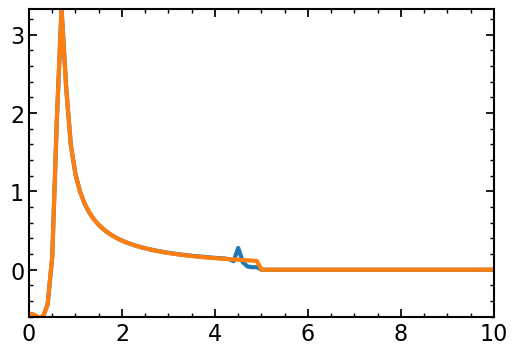

In [28]:
plt.plot(qrange2, ReG2)
plt.plot(qrange2, ReG2_2/pi**2)

# plt.semilogy()

[]

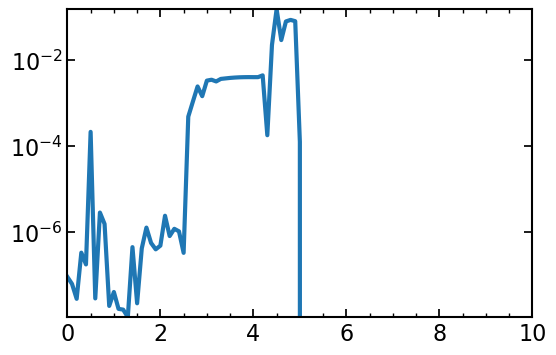

In [30]:
plt.plot(qrange2, abs(ReG2-ReG2_2/pi**2))

plt.semilogy()

### Im G2

In [31]:
ImG2 = array([tm.G2_conv_ff_pole(e, q, T, pt1.R, pt1.R) for q in tqdm.tqdm(qrange2)])

100%|██████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 15541.87it/s]


In [32]:
ImG2_2 = array([tm.G2_conv_ff_pole(e, q, T, iG, iG) for q in tqdm.tqdm(qrange2)]) / pi**2

100%|██████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 12794.46it/s]


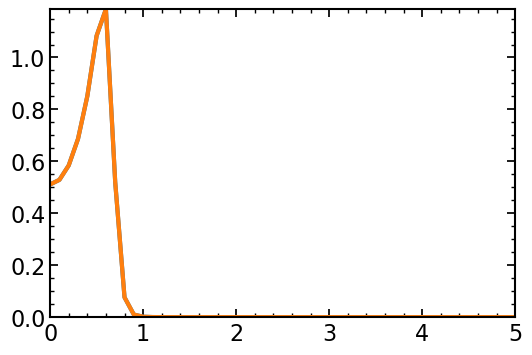

In [36]:
plt.plot(qrange2, ImG2)
plt.plot(qrange2, ImG2_2)

## Im as a function of E

In [40]:
q = 4.5

In [41]:
ImG2_e = array([tm.G2_conv_ff_pole(e, q, T, pt1.R, pt1.R) for e in tqdm.tqdm(erange)])




100%|██████████████████████████████████████████████████████████████████████████| 201/201 [00:00<00:00, 27664.73it/s]


In [55]:
pt1.R = iG

In [72]:
ch = QuarkTM.Channel(pt1, pt1, T, ImMode=1, expand=1, G2_mode=0)

In [77]:
i_q = np.argmin(abs(ch.qrange - q))
ch.qrange[i_q]

4.5

In [81]:
erange_dense = linspace(0, 10, 1500)

(8.0, 10.0)

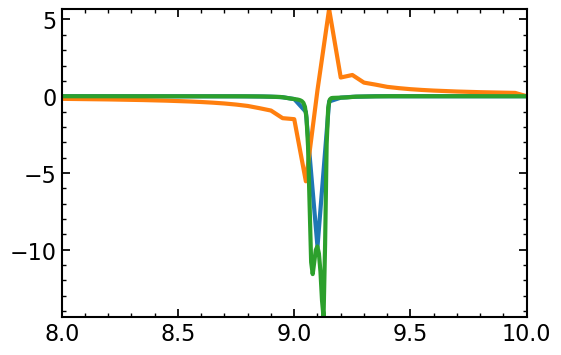

In [83]:
plt.plot(ch.erange, ch.ImG2[:, i_q])
plt.plot(ch.erange, ch.ReG2[:, i_q])
plt.plot(erange_dense, [ch.iImG2(q, e) for e in erange_dense])
plt.xlim(8, 10)

In [75]:
e = 2.5
i_e = argmin(abs(ch.erange - e))

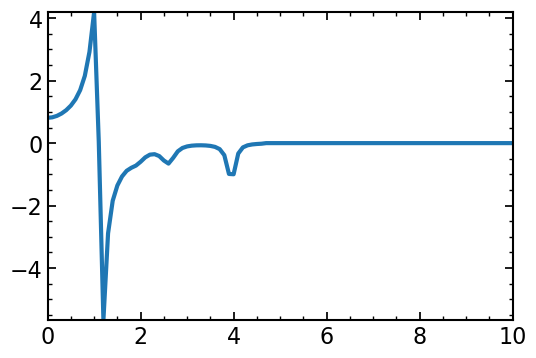

In [76]:
plt.plot(ch.qrange, ch.ReG2[i_e, :])
# plt.plot(ch.qrange)